In [2]:
import pandas as pd
import numpy as np
import ast
import os
import matplotlib.pyplot as plt
%matplotlib inline
import plotly
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)
cf.go_offline()

C:\Users\soham\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning:

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.0



In [ ]:
pip install plotly cufflinks mplcursors ipympl

In [54]:
df_name = []
for i in range(len(os.listdir("amazon_df_csvs"))):
    names = f'amazon_df{i}'
    df_name.append(names)

In [55]:
len(df_name)

225

In [56]:
all_dataset = []
for i in range(len(os.listdir("amazon_df_csvs"))):
    file_location = 'amazon_df_csvs' + '/' + os.listdir("amazon_df_csvs")[i]
    df_name[i] = pd.read_csv(file_location, index_col=0)
    all_dataset.append(df_name[i])
    break

In [57]:
amazon_df = pd.concat(all_dataset)
amazon_df = amazon_df.reset_index(drop =True)

In [58]:
def preprocessing(string):
    
    string = string.replace('\n', '')

    string = string.strip('[]')
    numbers = string.split()

    my_list = [float(num) for num in numbers]
    
    return(my_list)

In [59]:
for i in range(3):
    amazon_df.iloc[:,i] = amazon_df.iloc[:,i].apply(lambda x: preprocessing(x))

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [61]:
amazon_df = amazon_df.sample(n=500)

In [62]:
X = amazon_df.drop(columns = ['PRODUCT_LENGTH'])
Y = amazon_df.PRODUCT_LENGTH

In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state = 2)

In [64]:
reg = Pipeline([
    ('Linear Reg' , LinearRegression())
])

In [65]:
reg.fit(np.stack(X_train.values.flatten()).reshape(len(X_train),-1), Y_train.values)

Pipeline(steps=[('Linear Reg', LinearRegression())])

In [66]:
Y_pred = reg.predict(np.stack(X_test.values.flatten()).reshape(len(X_test), -1))

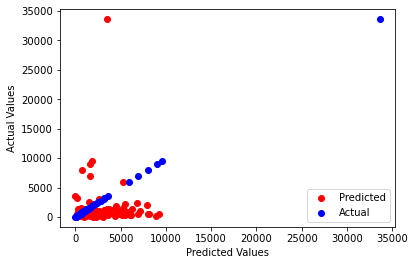

In [67]:
# Plotting the predicted values
plt.scatter(abs(Y_pred), Y_test, c='red', label='Predicted')

# Plotting the actual values
plt.scatter(Y_test, Y_test, c='blue', label='Actual')

plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.legend()
plt.show()

In [154]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error


mape = mean_absolute_percentage_error(graph['True'],graph['predicted'])
mse = mean_squared_error(graph['True'],graph['predicted'])

print('Mean Absolute Percentage Error ',mape)
print('Mean Square Error ',mse)

Mean Absolute Percentage Error  0.4785999999999999
Mean Square Error  85784670.48944399


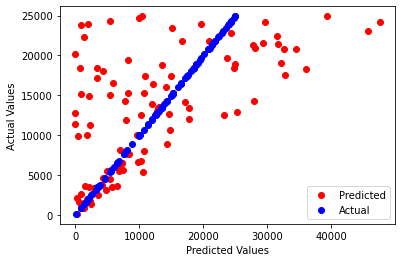

In [150]:
# Plotting the predicted values
plt.scatter(graph['predicted'], graph['True'], c='red', label='Predicted')

# Plotting the actual values
plt.scatter(graph['True'], graph['True'], c='blue', label='Actual')

plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.legend()
plt.show()